<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

- A device that provides random numbers is called random number generator (RNG).
- RNGs typically use random physical processes to generate the random numbers. These processes include radioactivity or noise in circuits.
- Here, the algorithm produces these numbers... so some may argue that these RGNs are not truly random. Thus, they're called pseudo RNG (PRNG).

- PRNGs will always give us a new number.
- A drawback is that the numbers will start to repeat once we've drawn enough numbers. 
- BUT Modern PRNG algorithm is so cool it requires many (10^19937 - 1) times before the numbers start to repeat. 

- PRNG produces uniformly distributed numbers between 0 and 1. 


### 1.2 NumPy’s PRNG

In [1]:
# This is to give one random number from numpy

np.random.rand()

0.006173150888266421

In [2]:
# This is to give ten random numbers from numpy

np.random.rand(10)

array([0.93695356, 0.37560064, 0.59061231, 0.97484652, 0.39375079,
       0.67905549, 0.93937857, 0.93773456, 0.2996127 , 0.13907461])

In [3]:
# This is to give 5 sets of 2 random numbers

np.random.rand(5, 2)

array([[0.89899613, 0.51474107],
       [0.73203643, 0.70401617],
       [0.37909299, 0.94246003],
       [0.92624632, 0.24450448],
       [0.2369093 , 0.78274645]])

##### Notes:
- All the numbers are between 0 and 1.
- The numbers are (more or less) evenly/uniformly distributed to cover the interval between 0 and 1. In order to convince ourselves, we genrate a large set of numbers and check if the percentages of numbers match. (See below!)

In [27]:
n = 10000
random_numbers = np.random.rand(n)

# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.51

In [28]:
n = 10000
random_numbers = np.random.rand(n)

# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.019999999999996

In [24]:
n = 10000
random_numbers = np.random.rand(n)

# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.31

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

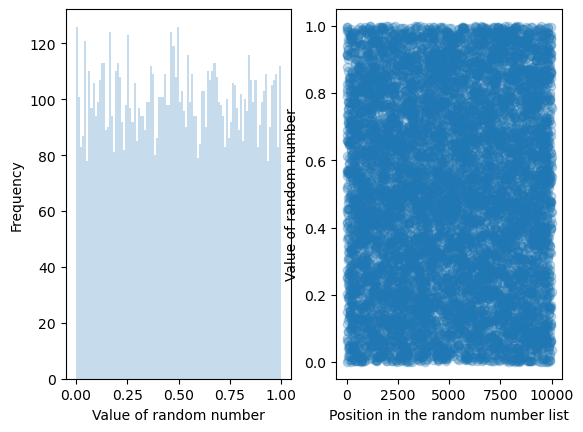

In [30]:
# We can show uniformity of the PRNG by plotting the numbers
# on a scatter plot or histogram.

from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel('Value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel('Position in the random number list')
axis.set_ylabel('Value of random number')


### 1.4 Uniformly beyond \([0,1)\)

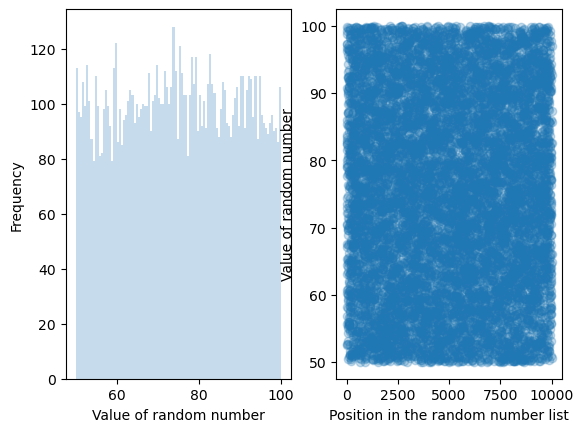

In [40]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel('Value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel('Position in the random number list')
axis.set_ylabel('Value of random number')

plt.show()

### 1.5 ‘seeding’ a PRNG

In [41]:
# Sometimes we need PRNG to generate the same set of numbers. 
# We can do this by specifying a seed, which is an integer
# that kicks off the PRNG algorithm. 

np.random.randint(0, 100, 10) # Ten integers between 0 and 100.


array([10, 28, 77, 12, 70, 38, 14, 88, 98, 35])

In [43]:
np.random.randint(0, 100, 10) # Another ten integers between 0 and 100.

array([98, 67, 33,  2, 84, 16, 39, 80,  4, 82])

In [44]:
np.random.seed(1234)           # This specifies the seed
np.random.randint(0, 100, 10)  # Ten integers between 0 and 100.

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [45]:
np.random.seed(1234)
np.random.randint(0, 100, 10)  # Same ten integers between 0 and 100.

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [67]:
# shake_magic_8() is a function 

def shake_magic_8():
    '''
    Function to stimulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']
    
    return np.random.choice(options)

In [68]:
questions = ['Will I pass SP2273?',
            'Will I be rich?',
            'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I pass SP2273?
A: Most likely.

Q: Will I be rich?
A: Outlook good.

Q: Will I be in trouble?
A: You may rely on it.



## 3 Flipping Coins

### 3.1 A fair coin

In [72]:
# Simulate a flip of a fair coin:

np.random.choice(['Head', 'Tails'])

'Tails'

In [73]:
# If i want 10 flips:

no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Head',
       'Head', 'Head'], dtype='<U5')

In [78]:
# If we agree to consider any number between 0 and 0.5 to be Tails,
# and any number between 0.5 and 1 to be Heads, then do this:

def flip_coins(no_of_coins = 1, probability=.5):
    '''
    Returns the number of values greater than
    'probability' (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of Heads: {no_of_heads/no_of_coins*100:.2f}%')

# Probability is set at .5 because we are using a fair coin.
# Because we want to flip the coins more, we created a function
# that gives the number of heads. 

Number of Heads: 50.30%


### 3.2 A biased coin

In [99]:
# You can simulate a biased coin by messing with probability.

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

# Since we want the probability for Heads to be 0.7, 
# we need to increase the chance of a number being considered a Head.
# Therefore, we have to make the probability = .3

###BETTER EXPLANATION###
# Since we want our biased coin to have higher probability of Heads,
# we set threshold to be 0.3. 
# This means that any number with the value above 0.3 will be
# designated as Heads. 
# Therefore, this ensures that about 70% of n number is above 0.3.


Number of heads: 67.90%


### 3.3 A flipping experiment

In [97]:
conda install scipy -c conda-forge -y   

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/AbigailAlexander/miniconda3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.1.0               |  py310hbe9552e_0         917 KB  conda-forge
    openssl-1.1.1t             |       h03a7124_0         1.5 MB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    scipy-1.10.1               |  py310ha0d8a01_0        19.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        21.5 MB

The following NEW packages will be INSTALLED:

  pooch              conda-forge/noarch::pooch-1.7.0-pyhd8ed1ab_0 
  scipy              conda-forge/osx-arm64::scipy-1.10.1-py310ha0d8a01_0 

The following packages will be UPDATED:

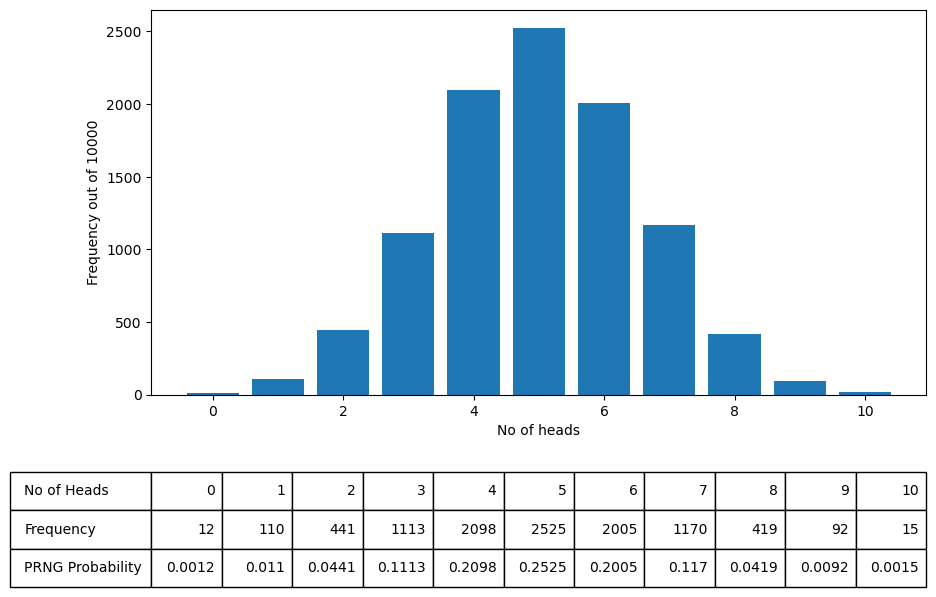

In [98]:
# If we flip 10 fair coins at once, 
# what is the probability that 7 of them will come out Heads?

# What to do is to flip 10 coins several thousand times and
# count the number of heads by using flip_coins(10)
# many times and keep score. 

from matplotlib import pyplot as plt

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

# np.unique() with return_counts()=True returns the unique
# values of Heads in the list and how many times they occur.
# We can get the probabilities by dividing the array with
# the counts by the number of repeats.
heads_probability = heads_counts/no_of_repeats

# Now plot the data!
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
         rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
         loc='bottom',
         bbox=[0, -0.5, 1, 0.3])

from scipy.stats import binom

binom.pmf(k=7, n=10, p=.5)

binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [261]:
# Q1
# Each cholesterol has 27 carbons.
# Some can be 12C, some can be 13C. 
# The probability of 13C is small (1.11%). 

# Treat each carbon atom in one cholesterol molecule to be a coin.
# But the probability of 13C is 1.11% so coin is very biased. 
# Generate 27 random numbers for (27 carbons) then 
# find the number of values that are bigger than 98.89%.

no_of_repeats = 1_000
no_of_coins = 27
no_of_13C = flip_coins(no_of_coins, probability = .9889)
result = [flip_coins(no_of_13C) for _ in range(no_of_repeats)]
#random_numbers = np.random.rand(no_of_repeats)

print(result)

print(np.mean(result), np.std(result))


[1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 

In [346]:
def flip_choles(no_of_coins=27, probability=.9889): #defaults set
    result = np.random.rand(no_of_coins)
    C13 = np.sum(result > probability)
    return C13

repeats = 1_000
manycholes = [] # empty list
for i in range(repeats):
    manycholes.append(flip_choles())
print(manycholes)
print(np.mean(manycholes), np.std(manycholes))



[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [368]:
# Q2

np_array_manycholes = np.array(manycholes)

prob_13C = (np.sum(np_array_manycholes==0)/repeats*100)

prob_13C

75.7